## <font color = "red">Question 1 : Robot Dataset</font>

## Import Essential Modules :
**Numpy :** <font color = blue>Array based efficient computations</font><br>
**Pandas :** <font color = blue>Manipulation of Datasets</font><br>
**pprint :** <font color = blue>Printing Decision Trees in a linearised way</font><br>

In [628]:
import numpy as np
import math
import pprint
import operator
import ipdb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

### Load Dataset stored in external  file in a pandas DataFrame
<font color = blue>The dataset starts with blank column, so it is to be handled accordingly.</font>

In [629]:
def load_preprocess_data(path):
    dataset = pd.read_csv(path, delimiter = " ", names = ['none', 'class_label', 'att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7'])
    drop_index = [0]
    dataset.drop(dataset.columns[drop_index],axis=1,inplace=True)
    dataset = dataset[['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7','class_label']]
    dataset.drop(dataset.columns[6],axis=1,inplace=True)
    return dataset

In [630]:
def manhattan_distance(p1, p2):
    distance = 0.0
    for i in range(0, len(p1) - 1):
        distance += (np.absolute(p1[i] - p2[i]))
    return distance

In [631]:
def euclid_distance(p1, p2):
    distance = 0.0
    for i in range(0, len(p1) - 1):
        distance += (np.square(p1[i] - p2[i]))
    return np.sqrt(distance)

In [632]:
def minkowski_distance(p1, p2):
    distance = 0.0
    p = 3
    for i in range(0, len(p1) - 1):
        distance += np.power(abs(p1[i] - p2[i]),p) 
    distance = np.power(distance , (1/p))
    return distance

In [633]:
def get_neighbours(training_set, test_instance, measure):
    distances = []
    if(measure == "euclid"):
        for index, train_instance in training_set.iterrows():
            dist = euclid_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
            
    elif(measure == "manhattan"):
         for index, train_instance in training_set.iterrows():
            dist = manhattan_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
    else:
        for index, train_instance in training_set.iterrows():
            dist = minkowski_distance(train_instance, test_instance)
            label = train_instance["class_label"]
            distances.append([label, dist])
            
    return sorted(distances, key = operator.itemgetter(1))

In [634]:
def knn(training_set, test_set, measure):
    predictions = []
    distances = []
    for index, test_instance in test_set.iterrows():
        distances.append((get_neighbours(training_set, test_instance, measure)))
        
    temp = []
    count_0 = 0
    count_1 = 0
    for i in range(0, len(distances)):
        length = len(distances[i])
        for j in range(0, length):
            if(distances[i][j][0] == 0):
                count_0 += 1
            else:
                count_1 += 1
            if (count_0 >= count_1):
                temp.append(0)
            else:
                temp.append(1)
        predictions.append(temp)
        count_0 = 0
        count_1 = 0
        temp = []
    
    return predictions
        
        

In [635]:
def accuracy(training_set, test_set, k, measure, dataset_index):
    t_pos = 0 
    t_neg = 0
    f_pos = 0
    f_neg = 0
    predicted = []
    
    dataset_1 = "./RobotDataset/Robot1"
    dataset_2 = "./RobotDataset/Robot2"
    
    if(dataset_index == 1):
        dataset = load_preprocess_data(dataset_1)
    else:
        dataset = load_preprocess_data(dataset_2)
    # train_data = dataset.sample(frac=0.8)
    # val_data = dataset.drop(train_data.index)
    train_data, val_data = np.split(dataset, [int(.8*len(dataset))])
    
    actual = test_set["class_label"].tolist()
    result = knn(training_set, test_set, measure)
    for i in range(0, len(result)):
        predicted.append(result[i][k - 1])
        
    for i in range(0, len(predicted)):
        if (predicted[i] == 0 and actual[i] == 0):
            t_neg += 1
        elif (predicted[i] == 0 and actual[i] == 1):
            f_neg += 1
        elif (predicted[i] == 1 and actual[i] == 0):
            f_pos += 1
        else:
            t_pos += 1
    return t_pos, t_neg, f_pos, f_neg  

In [636]:
def validate_robo(measure, dataset_index):
    output = pd.DataFrame(columns = ['K', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    for k in range(1, 12, 2):
        tp, tn, fp, fn = accuracy(train_data, val_data, k, measure, dataset_index)
        total = tp + tn + fp + fn
        accuracy_estimate = (tn + tp) / (total) * 100
        precision_estimate = tp / (tp + fp) * 100
        recall_estimate = (tp) / (tp + fn) * 100
        f1_score = (1 / recall_estimate) + (1 / precision_estimate)
        f1_score = (2 / f1_score)
        output = output.append({'K':k, 'Accuracy':accuracy_estimate, 'Precision':precision_estimate, 'Recall':recall_estimate, 'F1 Score':f1_score}, ignore_index=True)
    return output
    
        

## Robot 1 Dataset
### DataFrame showing various performance measures using Euclidian Distance for KNN

In [637]:
euclid_result_1 = validate_robo("euclid", 1)
euclid_result_1

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,56.0,81.250000,61.904762,70.270270
1,3.0,76.0,94.117647,76.190476,84.210526
2,5.0,76.0,94.117647,76.190476,84.210526
3,7.0,84.0,100.000000,80.952381,89.473684
4,9.0,80.0,100.000000,76.190476,86.486486
5,11.0,68.0,100.000000,61.904762,76.470588


### Graph Plotting : Accuracy vs 'K' value using Euclidian Distance

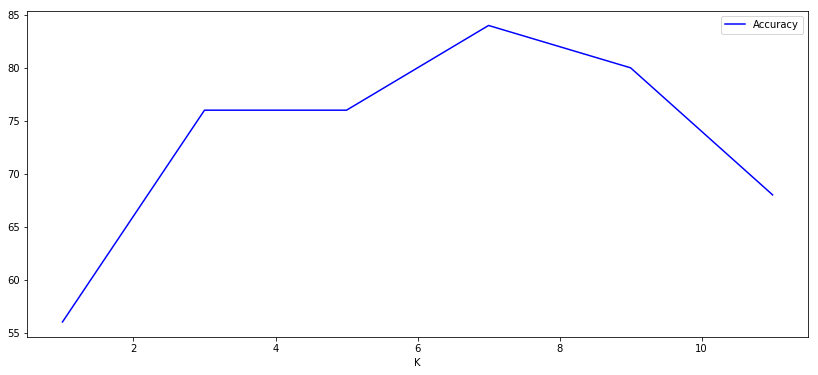

In [638]:
plt.rcParams['figure.figsize'] = (14,6)
euclid_result_1.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
plt.show()

### DataFrame showing various performance measures using Manhattan Distance for KNN

In [639]:
manhattan_result_1 = validate_robo("manhattan", 1)
manhattan_result_1

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,48.0,78.571429,52.380952,62.857143
1,3.0,52.0,90.909091,47.619048,62.500000
2,5.0,56.0,100.000000,47.619048,64.516129
3,7.0,56.0,100.000000,47.619048,64.516129
4,9.0,56.0,100.000000,47.619048,64.516129
5,11.0,52.0,100.000000,42.857143,60.000000


### Graph Plotting : Accuracy vs 'K' value using Manhattan Distance

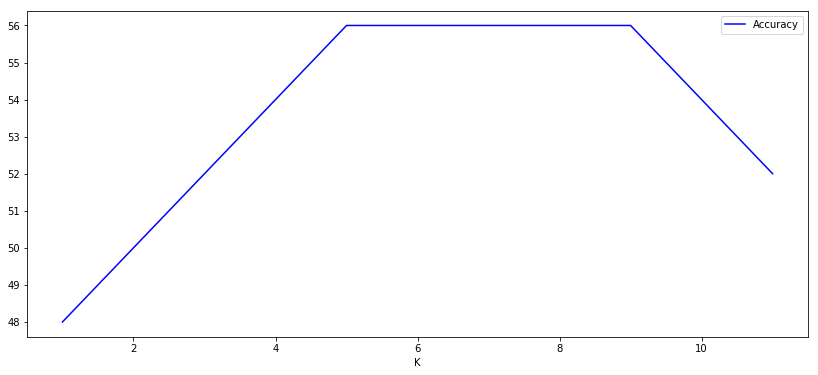

In [640]:
plt.rcParams['figure.figsize'] = (14,6)
manhattan_result_1.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
plt.show()

### DataFrame showing various performance measures using Minkowski Distance for KNN

In [641]:
minkowski_result_1 = validate_robo("minkowski", 1)
minkowski_result_1

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,56.0,81.250000,61.904762,70.270270
1,3.0,76.0,94.117647,76.190476,84.210526
2,5.0,80.0,94.444444,80.952381,87.179487
3,7.0,96.0,100.000000,95.238095,97.560976
4,9.0,84.0,100.000000,80.952381,89.473684
5,11.0,72.0,100.000000,66.666667,80.000000


### Graph Plotting : Accuracy vs 'K' value using Minkowski Distance

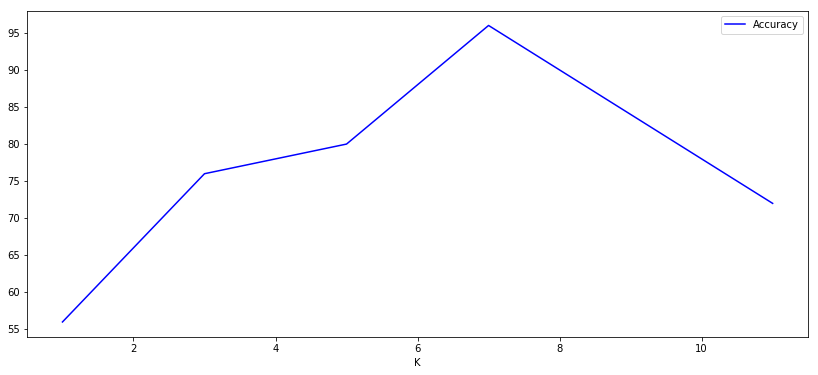

In [642]:
plt.rcParams['figure.figsize'] = (14,6)
minkowski_result_1.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
plt.show()

## Robot 2 Dataset
### DataFrame showing various performance measures using Euclidian Distance for KNN

In [643]:
euclid_result_2 = validate_robo("euclid", 2)
euclid_result_2

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,56.0,81.250000,61.904762,70.270270
1,3.0,76.0,94.117647,76.190476,84.210526
2,5.0,76.0,94.117647,76.190476,84.210526
3,7.0,84.0,100.000000,80.952381,89.473684
4,9.0,80.0,100.000000,76.190476,86.486486
5,11.0,68.0,100.000000,61.904762,76.470588


### Graph Plotting : Accuracy vs 'K' value using Euclidian Distance

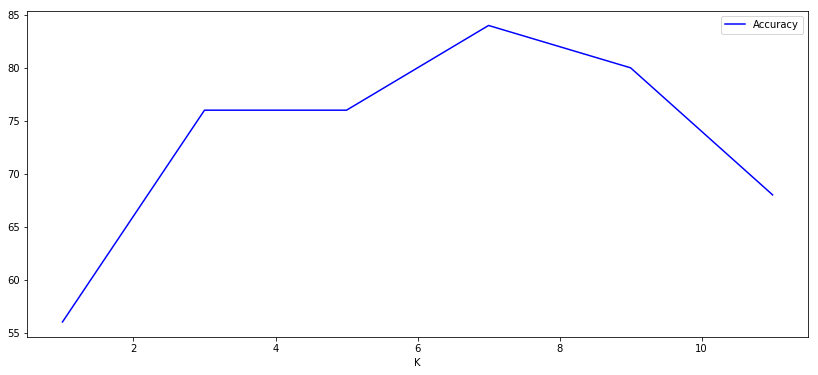

In [644]:
plt.rcParams['figure.figsize'] = (14,6)
euclid_result_2.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
plt.show()

### DataFrame showing various performance measures using Manhattan Distance for KNN

In [645]:
manhattan_result_2 = validate_robo("manhattan", 2)
manhattan_result_2

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,48.0,78.571429,52.380952,62.857143
1,3.0,52.0,90.909091,47.619048,62.500000
2,5.0,56.0,100.000000,47.619048,64.516129
3,7.0,56.0,100.000000,47.619048,64.516129
4,9.0,56.0,100.000000,47.619048,64.516129
5,11.0,52.0,100.000000,42.857143,60.000000


### Graph Plotting : Accuracy vs 'K' value using Manhattan Distance

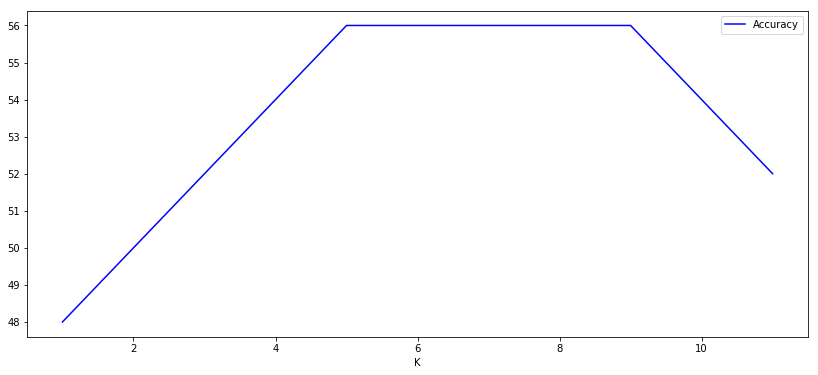

In [646]:
plt.rcParams['figure.figsize'] = (14,6)
manhattan_result_2.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
plt.show()

### DataFrame showing various performance measures using Minkowski Distance for KNN

In [647]:
minkowski_result_2 = validate_robo("minkowski", 2)
minkowski_result_2

,K,Accuracy,Precision,Recall,F1 Score
0,1.0,56.0,81.250000,61.904762,70.270270
1,3.0,76.0,94.117647,76.190476,84.210526
2,5.0,80.0,94.444444,80.952381,87.179487
3,7.0,96.0,100.000000,95.238095,97.560976
4,9.0,84.0,100.000000,80.952381,89.473684
5,11.0,72.0,100.000000,66.666667,80.000000


### Graph Plotting : Accuracy vs 'K' value using Minkowski Distance

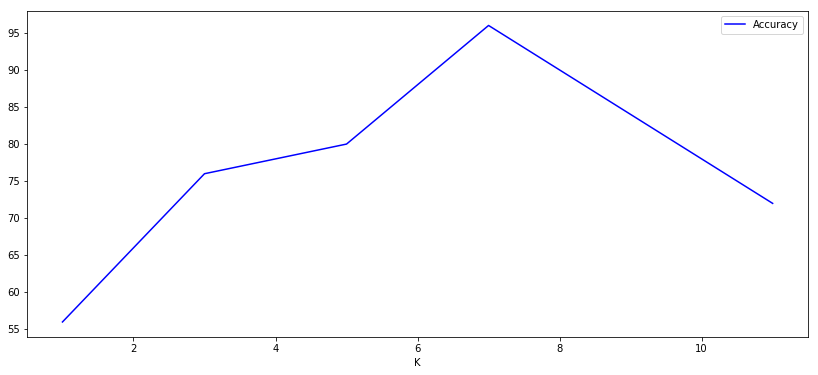

In [648]:
plt.rcParams['figure.figsize'] = (14,6)
minkowski_result_2.plot(kind='line',x = 'K',y = 'Accuracy',color = 'blue')
plt.show()

### <h1 font color = "blue" align = "center"> *********** THE END *************** </font>